In [14]:
# imports & installs

# %pip install pandas
# %pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(filepath_or_buffer="flagstat_qcpassed_0.05.csv")


df["file_path"] = df["file_path"].str.split("/").str[-1]
df["mapped_percent"] = df["mapped"] / df["total_reads"] * 100

In [26]:
df.sort_values(by="mapped_percent", ascending=False, inplace=True)
df

,file_path,total_reads,primary,secondary,suppelmentary,dupes,primary_dupes,mapped,primary_mapped,paired_in_seq,read1count,read2count,properly_paired,self_mate_mapped,singletons,mate_mapped_diffchr_mapqLT5,mate_mapped_diffchr_mapqGE5,mapped_percent
5,lion.bam,2000098,2000000,98,0,0,0,1989924,1989826,2000000,1000000,1000000,1984640,1986878,2948,2062,390,99.491325
4,leopard.bam,2001236,2000000,1236,0,0,0,1979158,1977922,2000000,1000000,1000000,1948654,1970402,7520,17286,7615,98.896782
6,tiger.bam,2001580,2000000,1580,0,0,0,1969104,1967524,2000000,1000000,1000000,1928846,1956822,10702,22486,10087,98.377482
0,bobcat.bam,2003446,2000000,3446,0,0,0,1917675,1914229,2000000,1000000,1000000,1813562,1883672,30557,54372,24871,95.718826
1,cat.bam,2003396,2000000,3396,0,0,0,1911103,1907707,2000000,1000000,1000000,1805550,1875288,32419,54878,25096,95.393172
3,hyena.bam,2005409,2000000,5409,0,0,0,891698,886289,2000000,1000000,1000000,569928,674530,211759,102812,39002,44.464645
2,human.bam,2000547,2000000,547,0,0,0,109216,108669,2000000,1000000,1000000,35280,42554,66115,6856,2181,5.459307


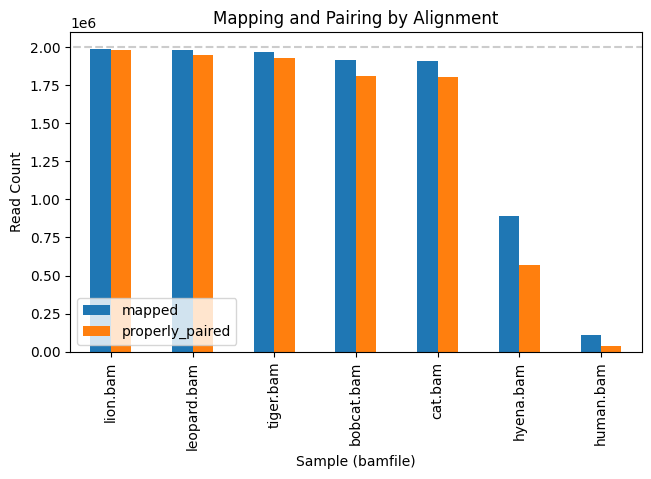

In [17]:
columns = ["file_path", "mapped", "properly_paired"]
ax = df[columns].plot.bar(x="file_path")

plt.tight_layout(pad=1)
plt.hlines(y=2000000, xmin=-1, xmax=7, colors=['#CCCCCC'], zorder=0, linestyles='dashed')
plt.legend(loc="lower left")
plt.title("Mapping and Pairing by Alignment")
ax.set_xlabel("Sample (bamfile)")
ax.set_ylabel("Read Count")
plt.show()

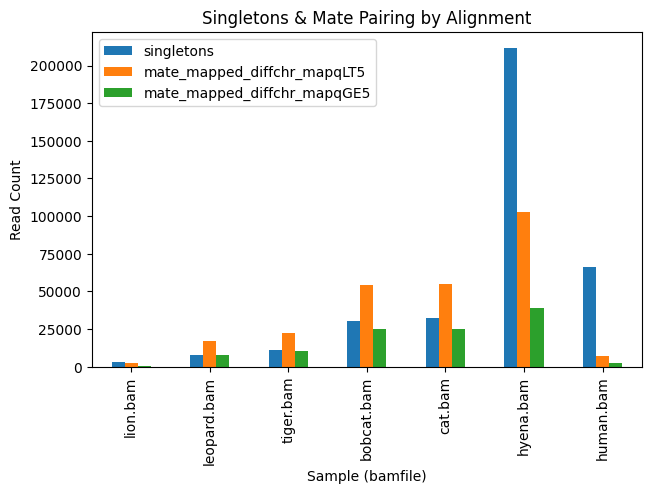

In [22]:
ax = (
    df[[
        "file_path",
         "singletons",
         "mate_mapped_diffchr_mapqLT5",
         "mate_mapped_diffchr_mapqGE5"
    ]]
    # .drop(index=[2, 3])
    .plot.bar(x="file_path")
)

plt.tight_layout(pad=1)
plt.title("Singletons & Mate Pairing by Alignment")
ax.set_xlabel("Sample (bamfile)")
ax.set_ylabel("Read Count")
plt.show()